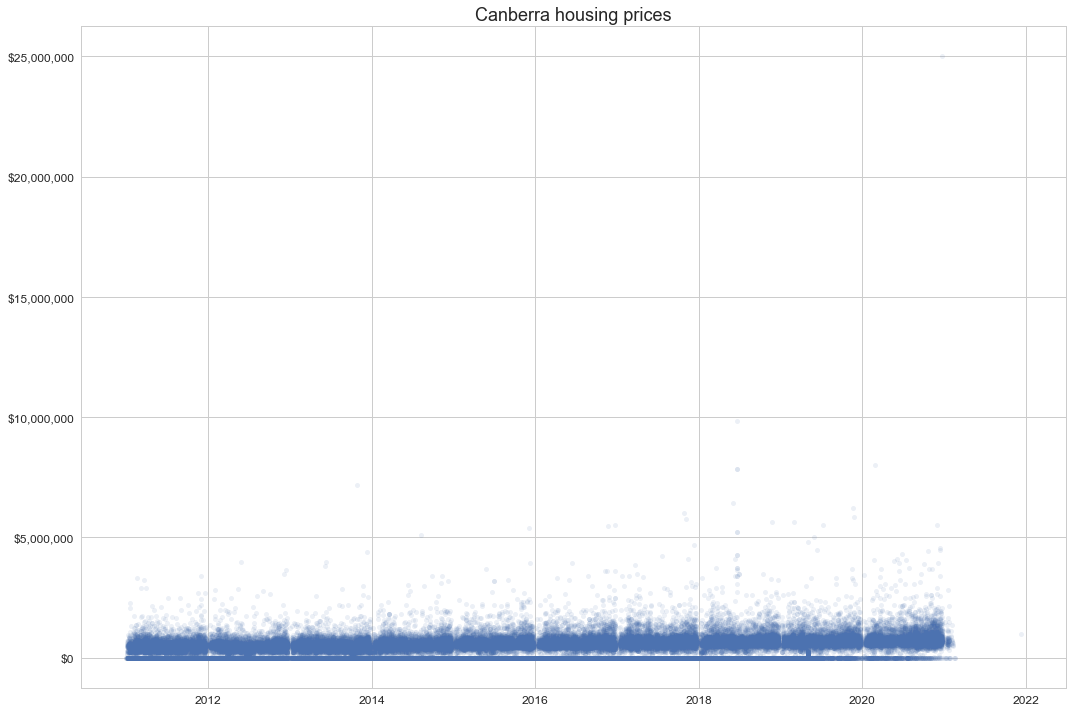

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("sale_data.csv")
data.date = pd.to_datetime(data.date, format="%d/%m/%Y")
data.price = data.price.apply(lambda x: int(x.replace("$", "").replace(",", "")) if x != "–" else 0)
data.type.unique()
data = data[(data.type == ("Single residential dwelling" or "Single residential dwelling..." or "Multiple unit dwelling" or "Medium density dwelling" or "For residential purposes"))] # & (data.price > 0) & (data.price < 2000000)]
data.sort_values("date", inplace=True)

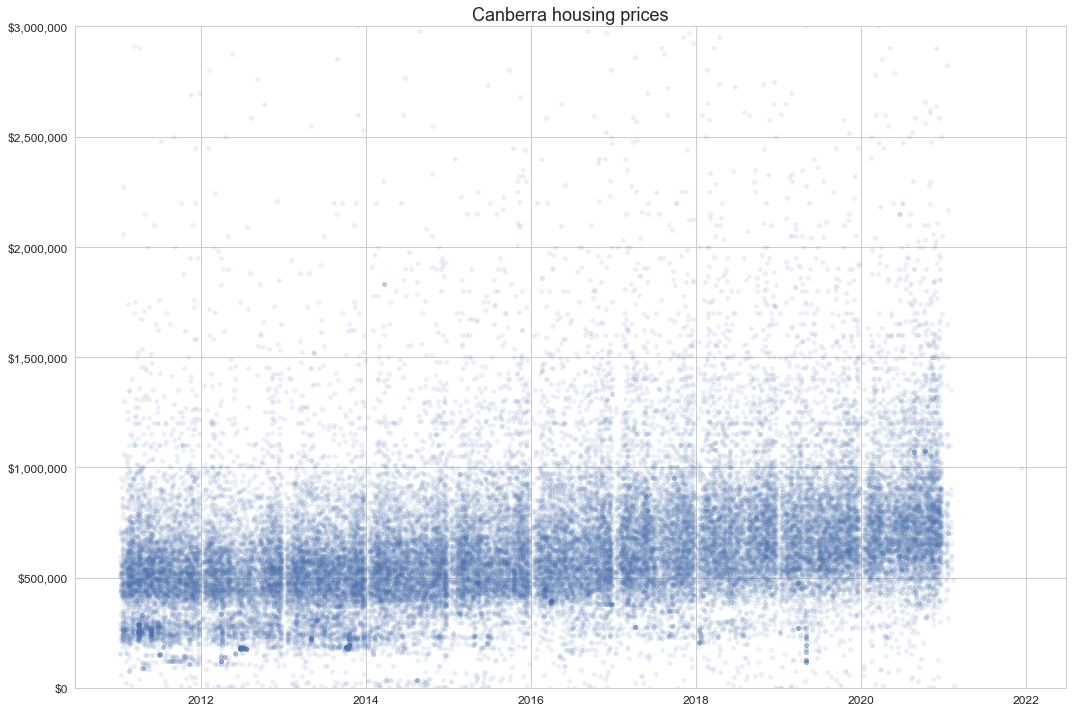

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("chart_data.csv", parse_dates=["date"])
data = data[data.price > 0]

plt.style.use("seaborn-whitegrid")
ax = data.plot.scatter("date", "price", figsize=(15, 10), alpha=.1, grid=True)
ax.yaxis.set_major_formatter(lambda x, p: f"${x:,.0f}")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(axis="both", labelsize=12)
plt.ylim((0, 3000000))
plt.title("Canberra housing prices", fontsize=18)
plt.tight_layout()
plt.savefig("./housing_prices.png")
plt.show()